<a href="https://colab.research.google.com/github/SuvimolM/Public/blob/main/SuvimolAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

# Task 3: Load in the Dataset

In [21]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)

In [22]:
print(boston_df.head(10))

   Unnamed: 0     CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  \
0           0  0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0   
1           1  0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0   
2           2  0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0   
3           3  0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0   
4           4  0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0   
5           5  0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0   
6           6  0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0   
7           7  0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0   
8           8  0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0   
9           9  0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0   

     TAX  PTRATIO  LSTAT  MEDV  
0  296.0     15.3   4.98  24.0  
1  242.0     17.8   9.14  21.6  
2  242.0     17.8   4.03  34.7 

# Task 4: Generate Descriptive Statistics and Visualizations

For the "Median value of owner-occupied homes" provide a boxplot

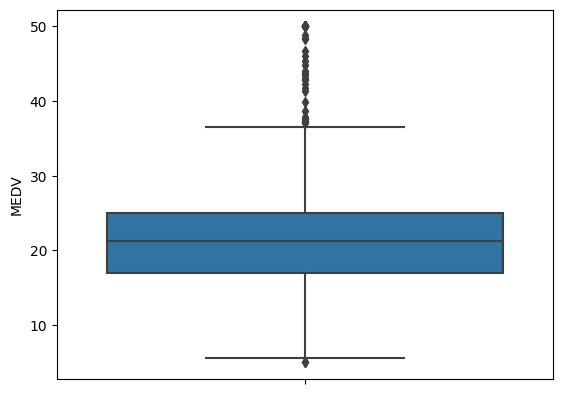

In [4]:
ax = sns.boxplot(y='MEDV', data=boston_df)

Provide a  bar plot for the Charles river variable

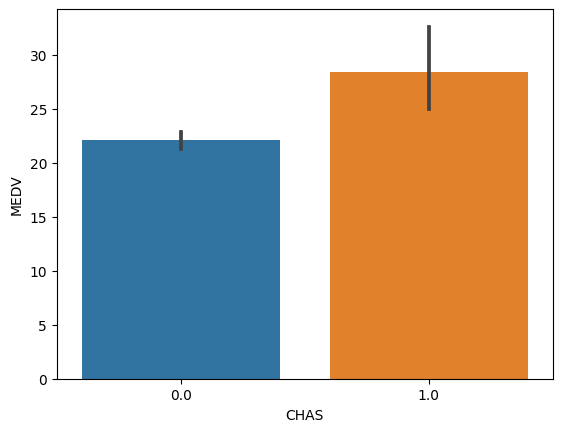

In [5]:
ax = sns.barplot(x="CHAS", y="MEDV", data=boston_df)


Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)


In [23]:
age_gr = {
    "1" : (0,35),
    "2" : (36,70),
    "3" : (70,100)
}

In [25]:
boston_df["Age Group"] = pd.cut(boston_df["AGE"], bins=[0,35,70,100], labels=["1","2","3"])

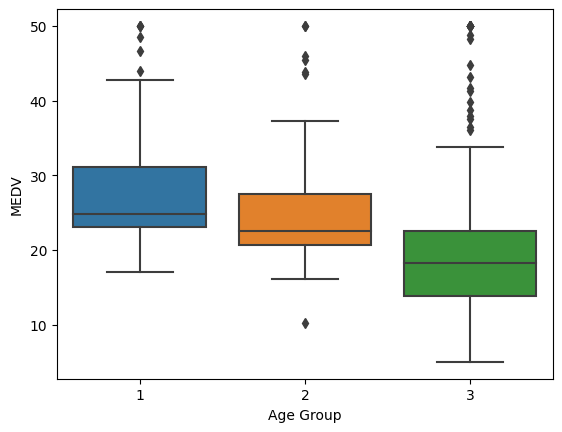

In [27]:
ax = sns.boxplot(x= "Age Group", y='MEDV', data=boston_df)

Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

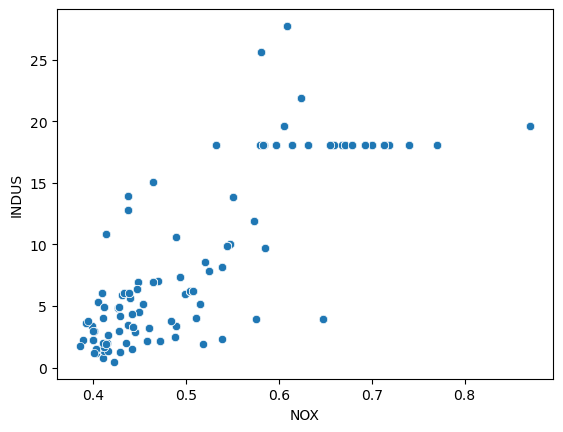

In [ ]:
ax = sns.scatterplot(x='NOX', y='INDUS', data=boston_df)

What can you say about the relationship?
- The relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town is not strong.


Create a histogram for the pupil to teacher ratio variable

<Axes: xlabel='PTRATIO', ylabel='Count'>

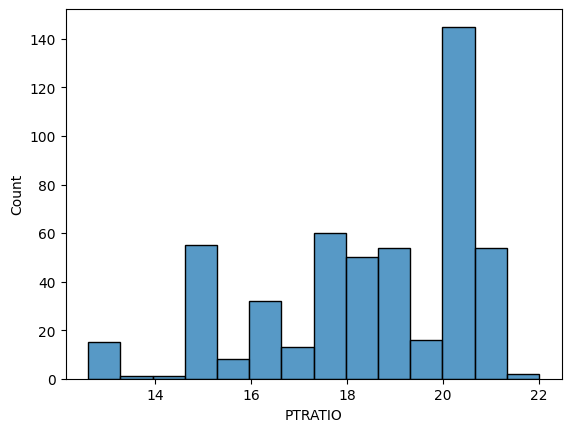

In [28]:
sns.histplot(data=boston_df, x="PTRATIO")

# Task 5: Use the appropriate tests to answer the questions provided

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

*   H0: median values of houses are not different
*   H1: median values of houses are different

In [31]:
import scipy.stats as stats

In [34]:
stats.ttest_ind(boston_df['MEDV'][boston_df['CHAS'] == 0],
                boston_df['MEDV'][boston_df['CHAS'] == 1])

Ttest_indResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05)

** pvalue=7.390623170519905e-05 < alpha (0.05) => reject H0 , therefore, we can conclude that median value of houses bounded by the Charles river are different from not bouded.

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)
*   H0: median values of houses are not different
*   H1: median values of houses are different

In [43]:
stats.f_oneway(boston_df['MEDV'][boston_df['Age Group'] == '1'],
               boston_df['MEDV'][boston_df['Age Group'] == '2'],
               boston_df['MEDV'][boston_df['Age Group'] == '3'])

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

** pvalue=1.7105011022702984e-15 < alpha (0.05) => reject H0 , therefore, we can conclude that median value of houses of each Age group are different.

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)
*   H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town
*   H1: There is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [46]:
r, p = stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])
print(p)

7.913361061239527e-98


** pvalue= 7.913361061239527e-98 < alpha (0.05) => reject H0 , therefore, we can conclude that there is relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [47]:
stats.linregress(boston_df['DIS'], boston_df['MEDV'])

LinregressResult(slope=1.0916130158411093, intercept=18.390088330493384, rvalue=0.2499287340859039, pvalue=1.2066117273371223e-08, stderr=0.18837841478683098, intercept_stderr=0.817388708502475)

Additional weighted distance to the five Boston employment centres impacts on the median value of owner occupied homes 1.0916